## Анализ результатов работы модели 1
На основе обучения модели с помощью градиентного спуска мы получили среднее значение функции ошибки, равное 0.5, что в свою очередь означает ошибку примерно в 70 000 доларов при предсказании цены на дом:
```
{
        "model": "model_1.py",
        "omega": [
            0.8295581690879604,
            0.12192014381787,
            -0.2736623153821008,
            0.3206203189293103,
            -0.004131815715346939,
            -0.0399833139874357,
            -0.9102943139380623,
            -0.8845137820727906
        ],
        "bias": 2.077350641957363,
        "eta": 0.15,
        "Number of iterations": 1000,
        "lm": 0.02,
        "feature_names": [
            "MedInc",
            "HouseAge",
            "AveRooms",
            "AveBedrms",
            "Population",
            "AveOccup",
            "Latitude",
            "Longitude"
        ],
        "trained_on": "2026-02-03 14:30:27.425519",
        "mse_on_train": 0.5232624469074074,
        "mse_on_test": 0.52914022942015
    }
```
Очевидно такой расклад нас не устраивает, надо попытаться понизить mse
Поэтому предлагается такой план:
1) Построить график таргетов и предсказания модели, проанализировать его
2) Опробовать L1 и L2 регуляризаторы на модели
3) Если пукнт 2 останется безуспешным, то попробуем аппрокисимровать таргеты более сложной моделью


## График таргетов и предсказаний модели 1

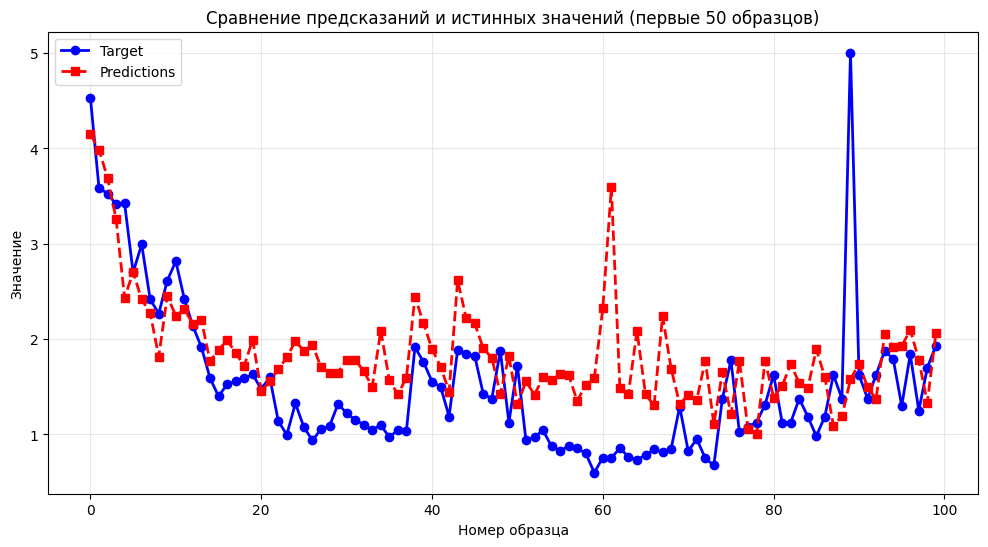

In [6]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
import numpy as np
import json
import matplotlib.pyplot as plt

X = read_csv('../data/features.csv')
y = read_csv('../data/target.csv').to_numpy().ravel()


# Масштабирование признаков (обязательно для градиентного спуска)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Добавление столбца единиц для смещения (w0)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

def model(w, X):
    """
    Модель для угадывания цен на дома 

    :param w: вектор весов
    :param X: матрица признаков обучающей выборки
    """
    return X @ w

def get_model_weights(filename:str):
    try:
        with open(filename,'r',encoding='utf-8') as file:
            data = json.load(file)
            for dictionary in data:
                if dictionary['model']=='model_1.py':
                    return [dictionary['bias']]+dictionary['omega']
            return None
    except FileNotFoundError:
        return None

w = np.array(get_model_weights('../data/model.json'))

y_pred = model(w,X_scaled)

plt.figure(figsize=(12, 6))
sample_indices = range(min(100, len(y)))

plt.plot(sample_indices, y[:100], 'b-', marker='o', label='Target', linewidth=2)
plt.plot(sample_indices, y_pred[:100], 'r--', marker='s', label='Predictions', linewidth=2)

plt.xlabel('Номер образца')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний и истинных значений (первые 50 образцов)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()